# Zonal means

In [2]:
from pathlib import Path 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import datetime
import pandas as pd 
import cartopy.crs as ccrs
mpl.style.use("../ccic.mplstyle")

In [47]:
# read in all datasets 
data_path = Path('/scratch/ccic_record/data/') 

# CloudSat
cloudsat_global = xr.load_dataset(data_path / "processed/cloudsat_ccic_tiwp_ca.nc")
dardar_zonal = cloudsat_global.where(cloudsat_global.tiwp_dardar < 1e3).tiwp_dardar.mean("longitude")
cloudsat_zonal = cloudsat_global.tiwp_2cice.mean("longitude")

#ERA5 
era5_global= xr.open_dataarray(data_path / 'ERA5'/ 'era5_tiwp_global_distribution.nc')

# MODIS 
modis = xr.open_dataset(data_path / 'modis' /  'global_distribution_cf_tiwp_modis.nc')
modis_global = modis.TIWP_global_distribution_masked / 1000

# ISCCP
isccp = xr.open_dataset(data_path / 'processed'/  'isccp_tiwp_ca.nc')
isccp_global = isccp.tiwp

# CCIC
ccic = xr.open_dataset(data_path / 'processed' /  'ccic_gridsat.nc')
# get CCIC coordinates 
ds = xr.open_dataset('/scratch/ccic_record/data/ccic/gridsat/ccic_gridsat_199911_monthlymean.nc') 
# assign coordinates 
coords = {'latitude': ds.latitude.values, 'longitude': ds.longitude.values}
ccic = ccic.assign_coords(coords)
ccic_global = ccic.tiwp

# PATMOS
patmosx = xr.open_dataset(data_path  / 'PATMOS-x_timeseries198108-202106_notebook_results.nc')
patmosx_global = patmosx.tiwp_fullaverage / 1000

# 2C-ICE 

cloudsat = xr.open_dataset('/scratch/ccic_record/data/cloudsat/cloudsat_monthly_mean_timeseries.nc') 

# DARDAR

# CPCIR 
cpcir = xr.open_dataset('/scratch/ccic_record/data/ccic/cpcir/ccic_cpcir_1998-2023_monthlymeans.nc')
cpcir_global = cpcir.tiwp

In [48]:
plt.imshow(patmosx.tiwp_fullaverage)

### Calculate zonal averages 

In [49]:
era5_zonal =  era5_global.mean('longitude')
ccic_zonal =  ccic_global.mean('longitude')
cpcir_zonal =  cpcir_global.mean('longitude')
modis_zonal =  modis_global.mean('lon')
patmosx_zonal =  patmosx_global.mean('longitude')
isccp_zonal =  isccp_global.mean('longitude')

In [50]:
from matplotlib.colors import to_rgba
import seaborn as sns
sns.reset_orig()
c0 = sns.desaturate(to_rgba("#f5316c"), 0.4)

In [51]:
import cmocean

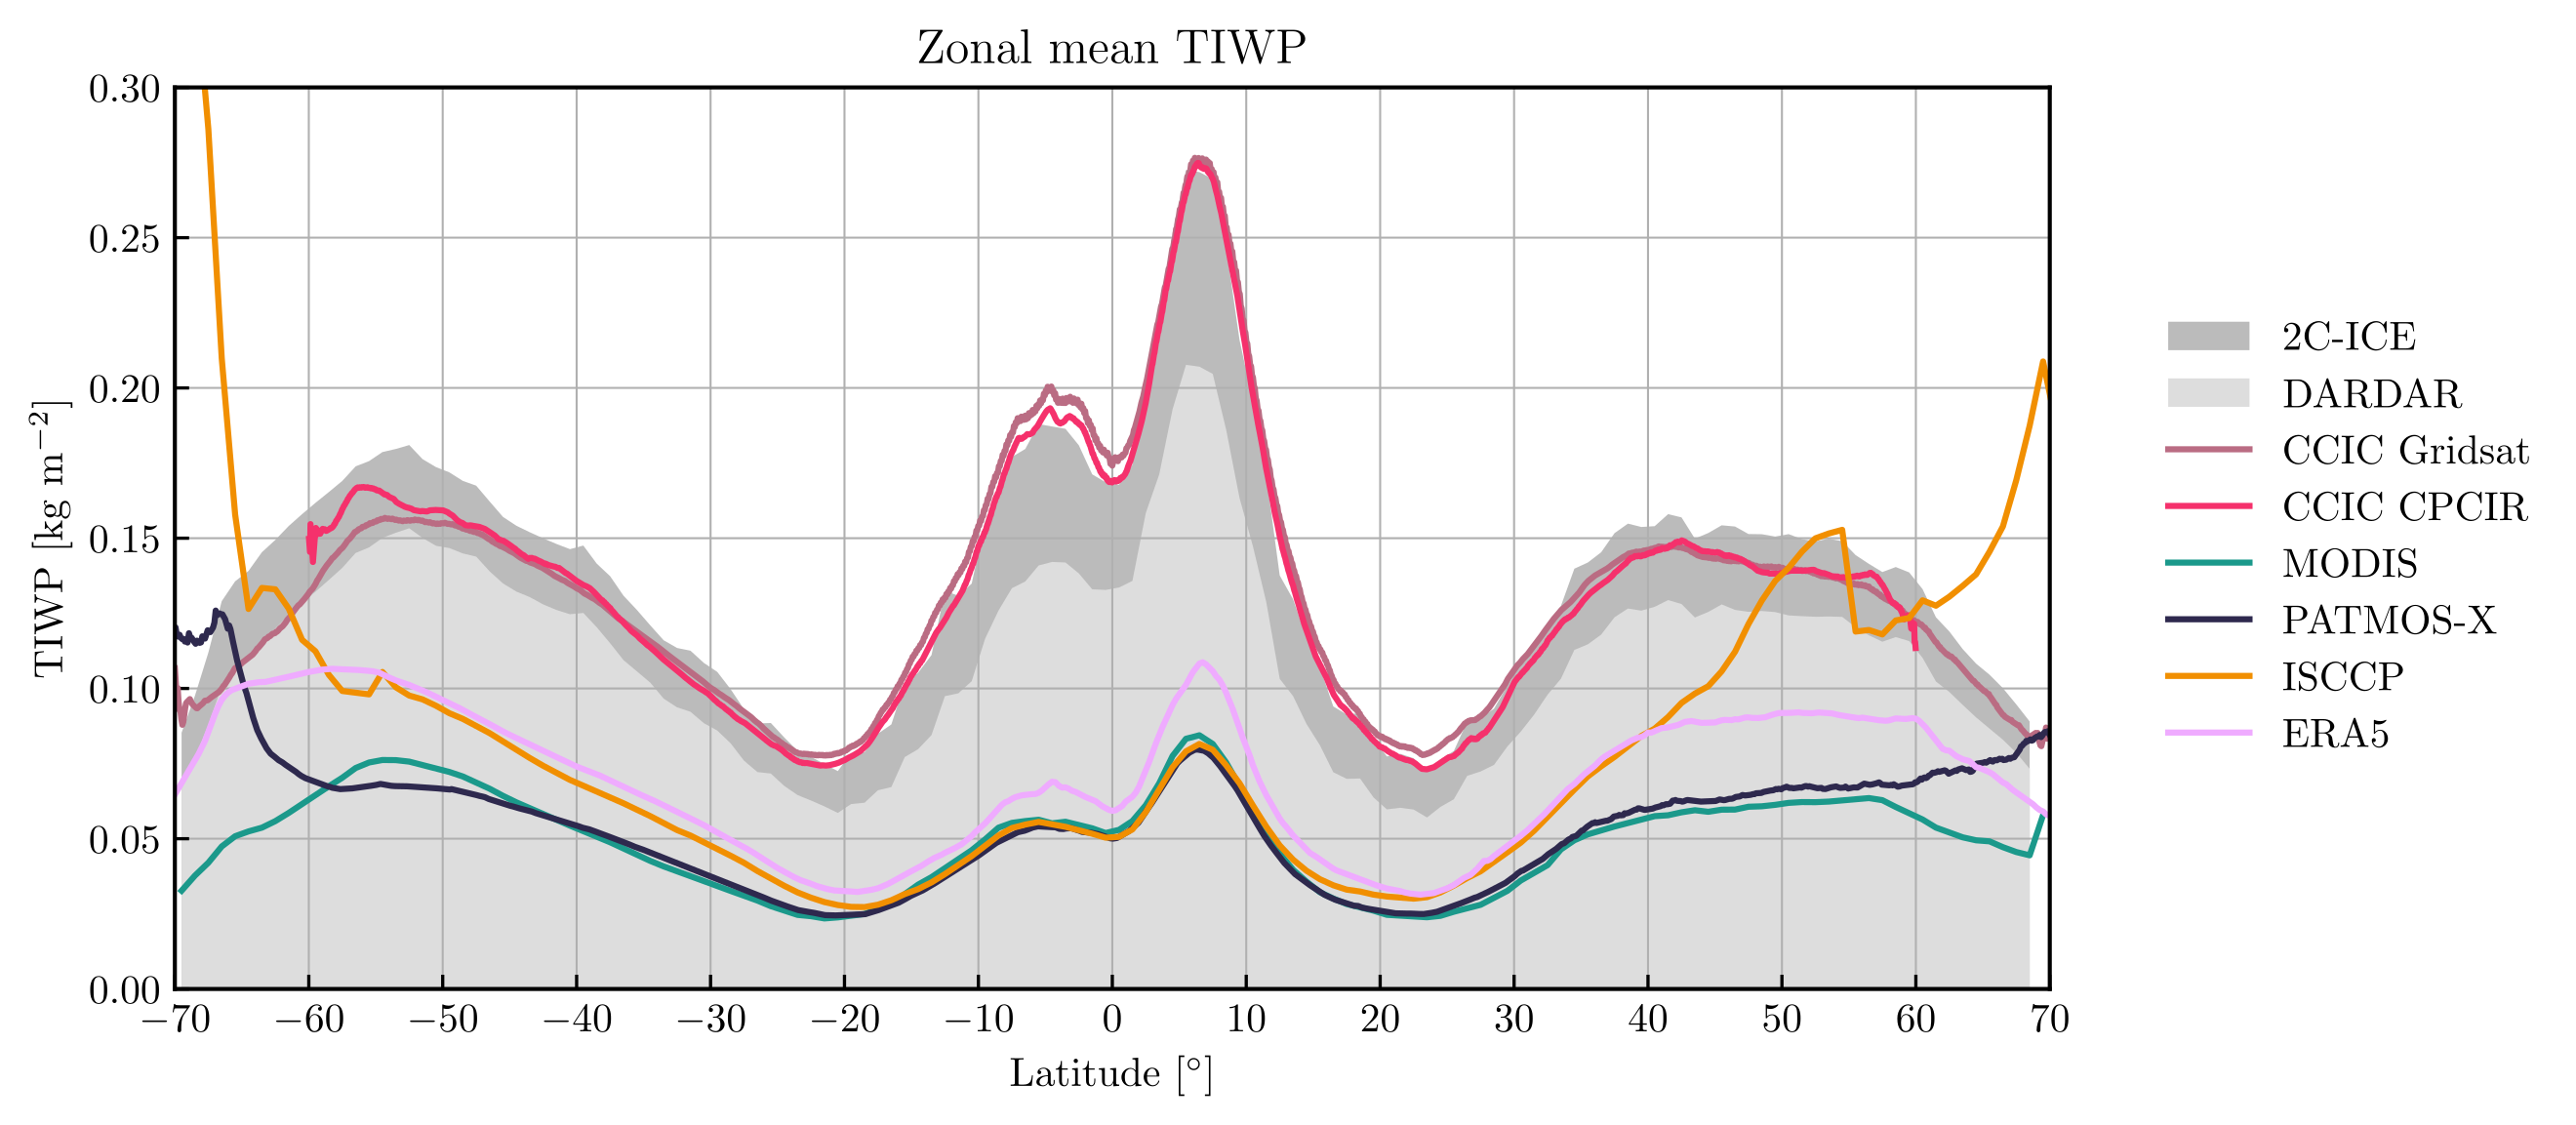

In [59]:
import seaborn as sns
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 4))
gs = GridSpec(1, 2, width_ratios=[1.0, 0.1])
ax = fig.add_subplot(gs[0, 0])

lw = None
fs = 20 

handles = []
handles.append(ax.fill_between(cloudsat_zonal.latitude, 0, cloudsat_zonal, facecolor="#bbbbbb", label="2C-ICE"))
handles.append(ax.fill_between(dardar_zonal.latitude, 0, dardar_zonal, facecolor="#dddddd", label="DARDAR"))
handles += ax.plot(ccic_zonal.latitude, ccic_zonal, lw = lw, label = 'CCIC Gridsat', c=c0)
handles += ax.plot(cpcir_zonal.latitude, cpcir_zonal, lw = lw, label = 'CCIC CPCIR', c="C0")
handles += ax.plot(modis_zonal.lat, np.flip(modis_zonal, axis = 0) , lw = lw , label = 'MODIS', c="C1")
handles += ax.plot(patmosx_zonal.latitude, patmosx_zonal, lw = lw, label = 'PATMOS-X', c="C2")
handles += ax.plot(isccp_zonal.latitude,  isccp_zonal, lw = lw, label = 'ISCCP', c="C3")
handles += ax.plot(era5_zonal.latitude, era5_zonal, lw = lw , label = 'ERA5', c="C4")

ax.set_xticks(np.arange(-90, 100, 10 ))
ax.set_xlabel('Latitude [$^\circ$]') 
ax.set_ylabel('TIWP [kg m$^{-2}$]')
ax.grid()
ax.set_xlim(-70, 70)
ax.set_ylim(0, 0.3)
ax.set_title("Zonal mean TIWP", loc="center")

ax = fig.add_subplot(gs[0, 1])
ax.set_axis_off()
ax.legend(handles=handles, loc="center", frameon=False)
plt.savefig(data_path / ".." / 'tiwp_zonal_means.pdf', bbox_inches = 'tight')
plt.show()